In [60]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.graph_objects as go
import plotly.subplots as sp
import import_ipynb
import utils
from importlib import reload
reload(utils)

ModuleSpec(name='utils', loader=<import_ipynb.NotebookLoader object at 0x00000156E5270E30>, origin='utils.ipynb')

In [ ]:
years = ['1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']

In [ ]:
import pandas as pd

pop = {}
for year in years:
    # Lire le fichier CSV et définir 'country' comme index
    df = pd.read_csv(f'./data_cleaned/population/{year}_population.csv')
    df.set_index('country', inplace=True)
    if year == '2020':
        pop[year] = df['2021(JO-2020)']
    else:
        pop[year] = df[year]

# Exemple pour accéder à une valeur spécifique dans le dictionnaire de population
print(pop['1992']['Albania'])


0.0027790077526889
0.0019858882909514


In [ ]:
medals = pd.read_csv('second_part_countries_cleaned.csv')

# Réinitialiser l'index
medals = medals.reset_index(drop=True)

# Créer un dictionnaire pour stocker les résultats par année
results_by_year = {}

# Parcourir chaque ligne du DataFrame et ajouter les résultats au dictionnaire
for index, row in medals.iterrows():
    year = str(int(row['year']))
    results_by_year[year] = row.drop('year')

# Ecraser la variable medals
medals = results_by_year.copy()

# Exemple pour accéder à une valeur spécifique dans le dictionnaire de medals
print(medals['1992']['Albania'])


1.0


In [5]:
'''
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
pop = pd.read_csv('./data_cleaned/population/1992_population.csv')
medals = pd.read_csv('second_part_countries_cleaned.csv')

# Suppression de la colonne 'year' dans medals
medals = medals.drop(columns=['year'])

# Extraction de la première ligne de 'medals' et transposition
medals = medals.iloc[[0]].T  # La première ligne devient une série avec des indices (pays, ou autre)
medals.columns = ['medals']  # Renommer la colonne si nécessaire pour l'affichage

# Supposons que 'pop' a une colonne 'country' pour faire la correspondance avec medals
# Extraction de la colonne 'country' et '1992' pour la population
pop = pop[['country', '1992']]  # Utilisation de '1992' comme nom de la colonne pour la population

# Fusionner 'pop' et 'medals' sur la colonne 'country'
merged = pd.merge(pop, medals, left_on='country', right_index=True, how='inner')

# Exclure la Chine et l'Inde du DataFrame
merged = merged[~merged['country'].isin(['China', 'India', 'USA'])]

# Tracé
plt.plot(merged['1992'], merged['medals'], '.', label='Points')

# Ajouter les labels des pays
for i, country in enumerate(merged['country']):
    plt.text(merged['1992'].iloc[i], merged['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')

# Configurer l'échelle logarithmique pour l'axe des X
# plt.xscale('log')
plt.xlabel("Population")
plt.ylabel("Nombre de médailles")
plt.title("Nombre de médailles en fonction de la population")
plt.show()
'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Chargement des données\npop = pd.read_csv(\'./data_cleaned/population/1992_population.csv\')\nmedals = pd.read_csv(\'second_part_countries_cleaned.csv\')\n\n# Suppression de la colonne \'year\' dans medals\nmedals = medals.drop(columns=[\'year\'])\n\n# Extraction de la première ligne de \'medals\' et transposition\nmedals = medals.iloc[[0]].T  # La première ligne devient une série avec des indices (pays, ou autre)\nmedals.columns = [\'medals\']  # Renommer la colonne si nécessaire pour l\'affichage\n\n# Supposons que \'pop\' a une colonne \'country\' pour faire la correspondance avec medals\n# Extraction de la colonne \'country\' et \'1992\' pour la population\npop = pop[[\'country\', \'1992\']]  # Utilisation de \'1992\' comme nom de la colonne pour la population\n\n# Fusionner \'pop\' et \'medals\' sur la colonne \'country\'\nmerged = pd.merge(pop, medals, left_on=\'country\', right_index=True, how=\'inner\')\n\n# Exclure l

In [53]:
# Suppression de la colonne 'year' dans medals
medals = medals.drop(columns=['year'])

# Extraction de la première ligne de 'medals' et transposition
medals = medals.iloc[[0]].T  # La première ligne devient une série avec des indices (pays, ou autre)
medals.columns = ['medals']  # Renommer la colonne si nécessaire pour l'affichage

# Supposons que 'pop' a une colonne 'country' pour faire la correspondance avec medals
# Extraction de la colonne 'country' et '1992' pour la population
pop = pop[['country', '1992']]  # Utilisation de '1992' comme nom de la colonne pour la population

# Fusionner 'pop' et 'medals' sur la colonne 'country'
merged = pd.merge(pop, medals, left_on='country', right_index=True, how='inner')

# Exclure la Chine et l'Inde du DataFrame (si nécessaire)
# merged = merged[~merged['country'].isin(['China', 'India'])]

# Créer trois sous-graphes côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Filtrer les données pour la population comprise entre [0, threshold1] pour le premier graphique
merged1 = merged[merged['1992'] <= threshold1]

# Tracer le premier graphique (population entre 0 et threshold1)
axes[0].plot(merged1['1992'], merged1['medals'], '.', label='Points')
for i, country in enumerate(merged1['country']):
    axes[0].text(merged1['1992'].iloc[i], merged1['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
# axes[0].set_xscale('log')
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Nombre de médailles")
axes[0].set_title(f"Pays avec Population [0, {threshold1}]")

# Filtrer les données pour la population comprise entre ]threshold1, threshold2] pour le second graphique
merged2 = merged[(merged['1992'] > threshold1) & (merged['1992'] <= threshold2)]

# Tracer le deuxième graphique (population entre threshold1 et threshold2)
axes[1].plot(merged2['1992'], merged2['medals'], '.', label='Points')
for i, country in enumerate(merged2['country']):
    axes[1].text(merged2['1992'].iloc[i], merged2['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
# axes[1].set_xscale('log')
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Nombre de médailles")
axes[1].set_title(f"Pays avec Population ]{threshold1}, {threshold2}]")

# Filtrer les données pour la population comprise entre ]threshold2, 1] pour le troisième graphique
merged3 = merged[merged['1992'] > threshold2]

# Tracer le troisième graphique (population entre threshold2 et 1)
axes[2].plot(merged3['1992'], merged3['medals'], '.', label='Points')
for i, country in enumerate(merged3['country']):
    axes[2].text(merged3['1992'].iloc[i], merged3['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
axes[2].set_xscale('log')
axes[2].set_xlabel("Population")
axes[2].set_ylabel("Nombre de médailles")
axes[2].set_title(f"Pays avec Population ]{threshold2}, 1]")

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()


AttributeError: 'dict' object has no attribute 'drop'

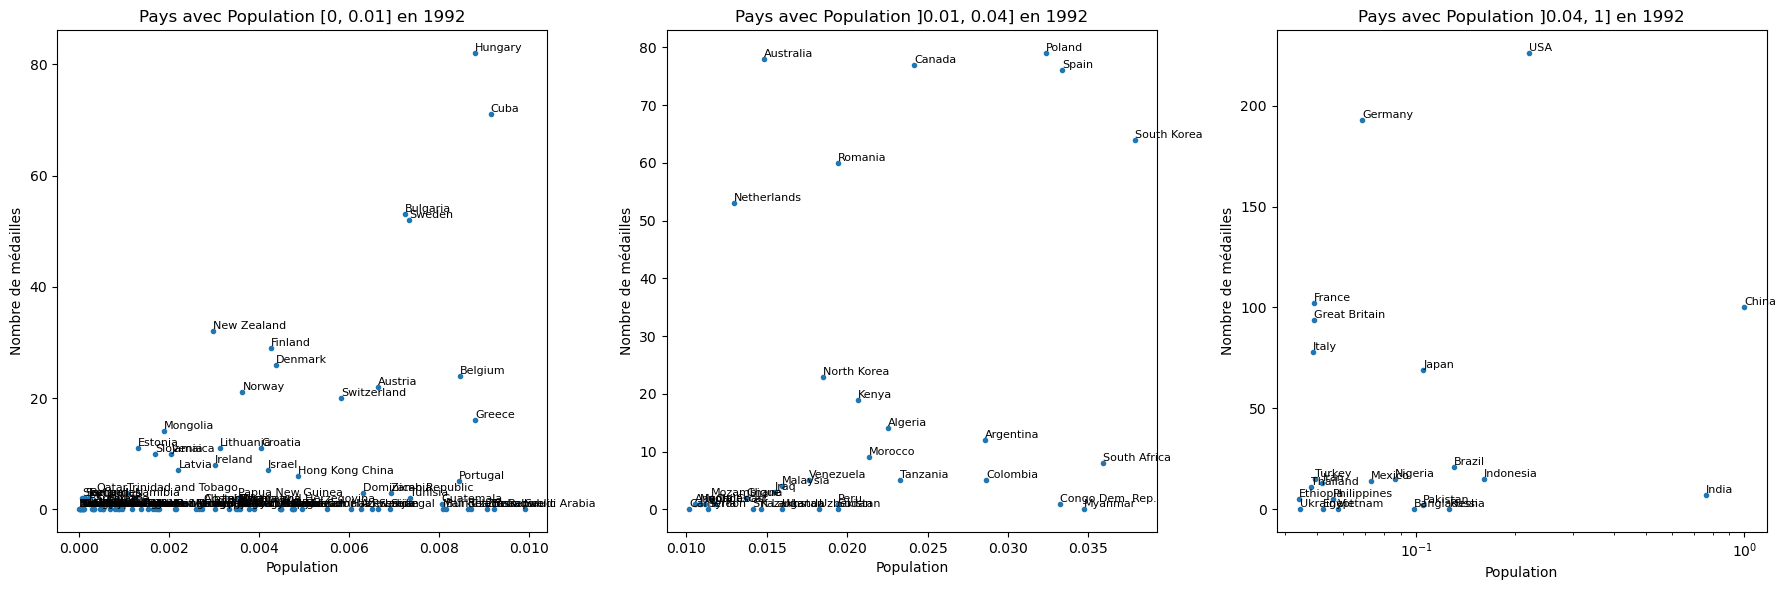

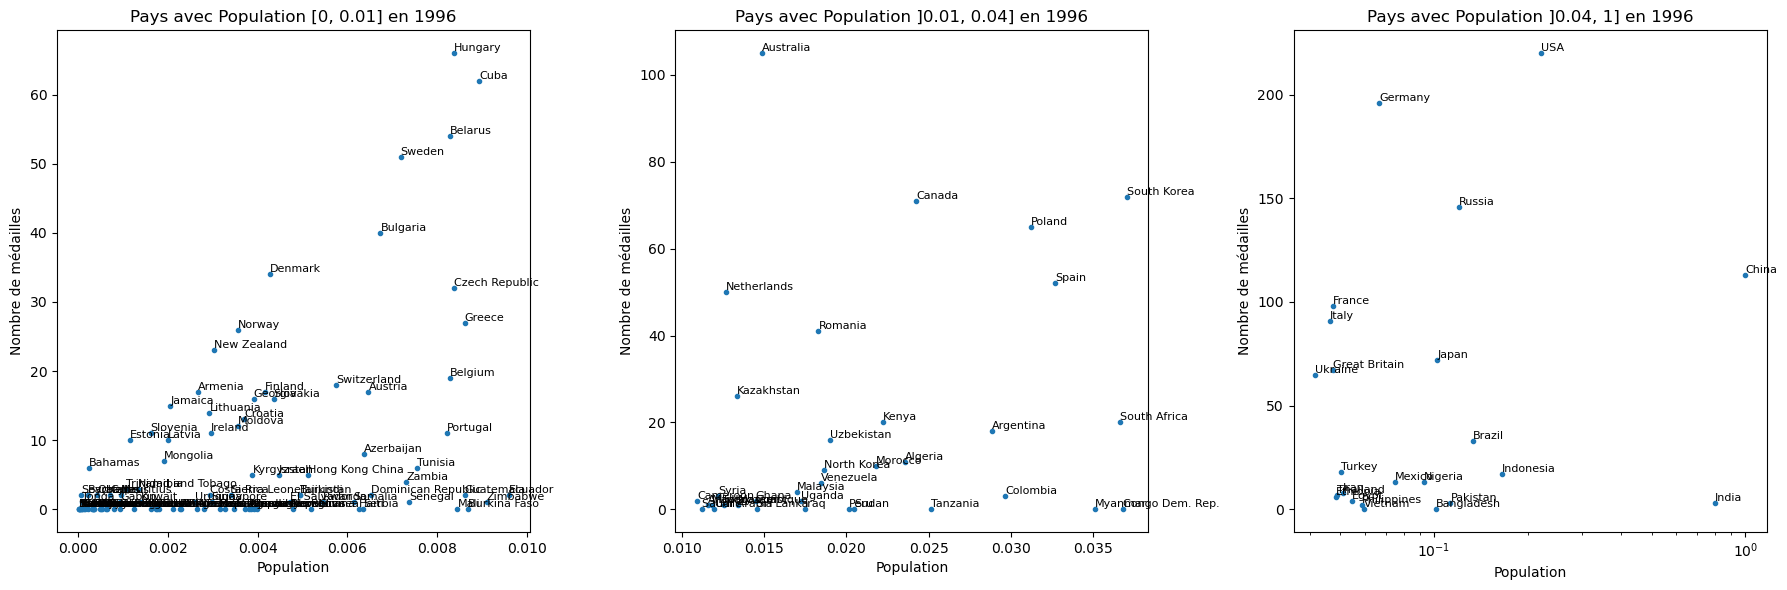

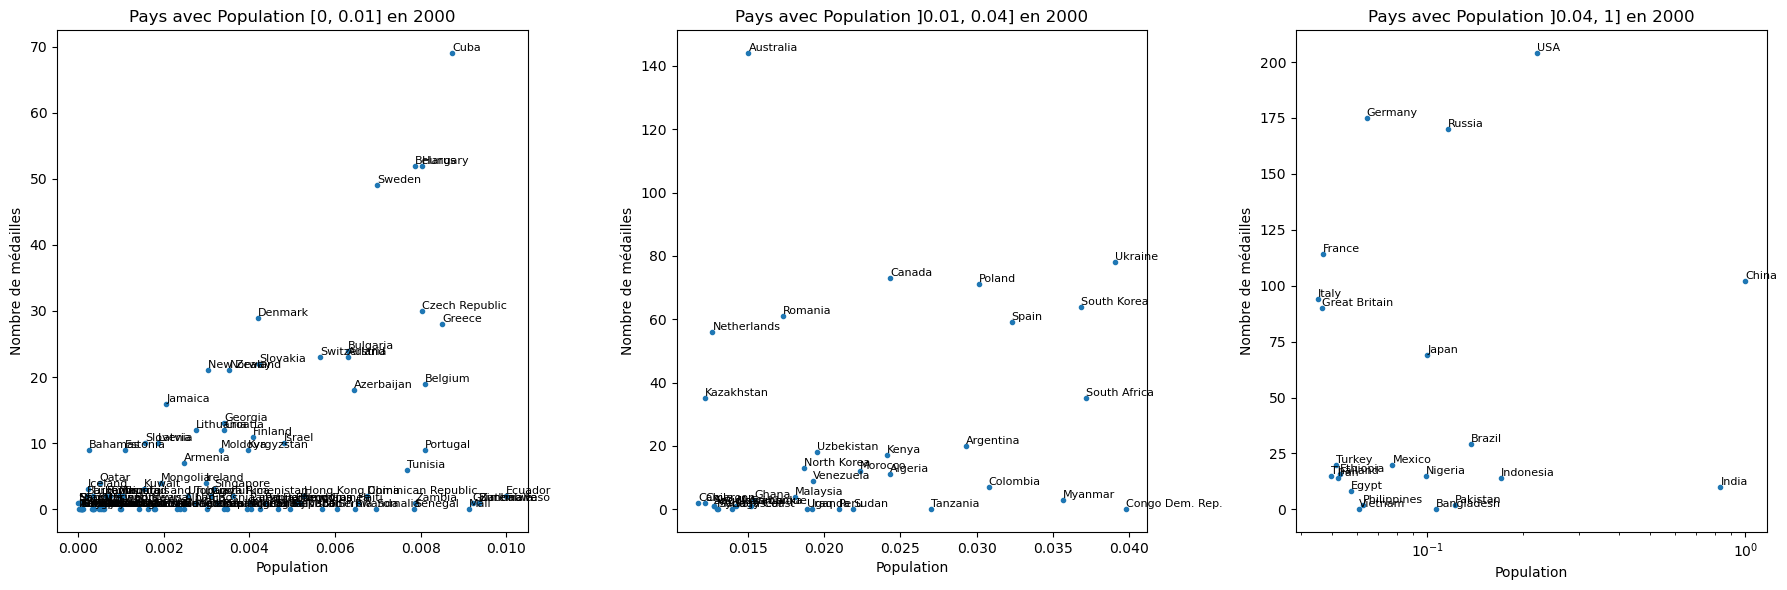

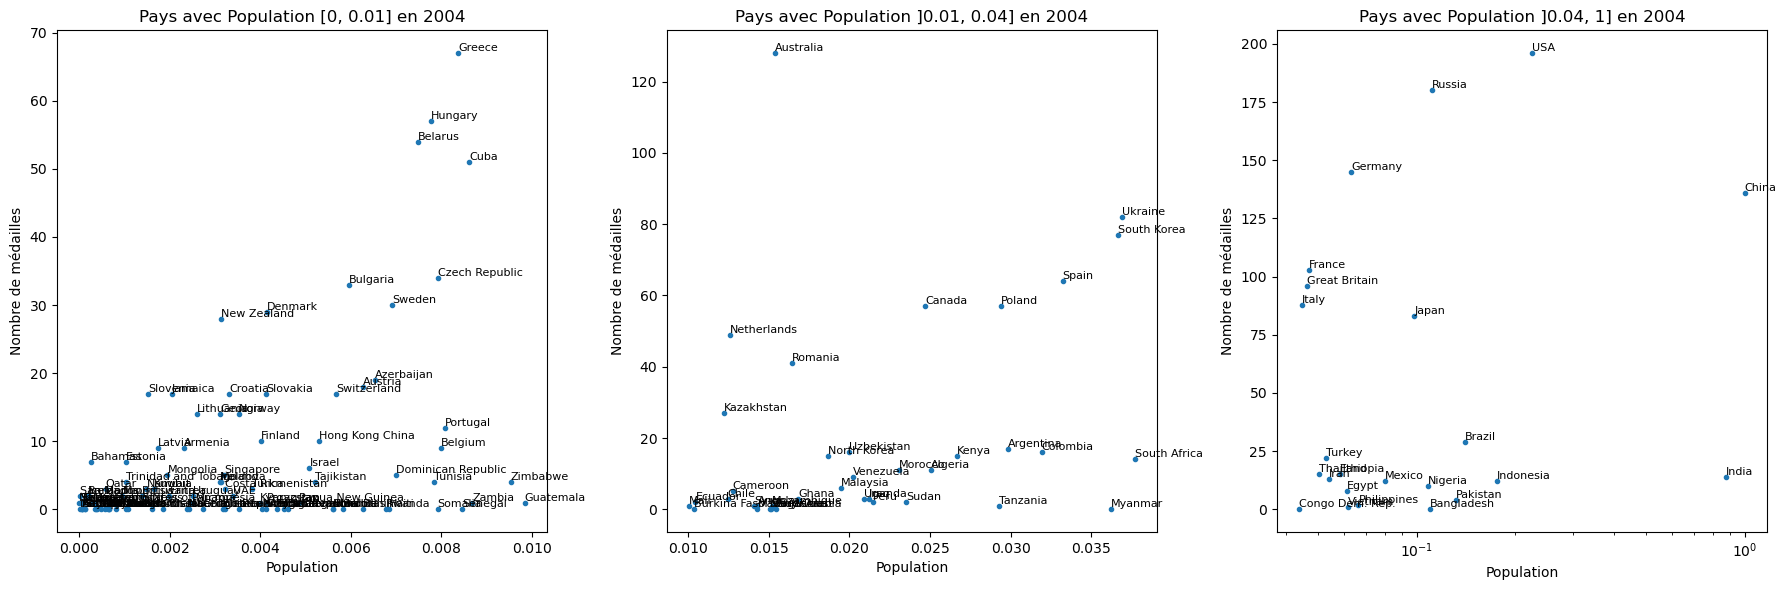

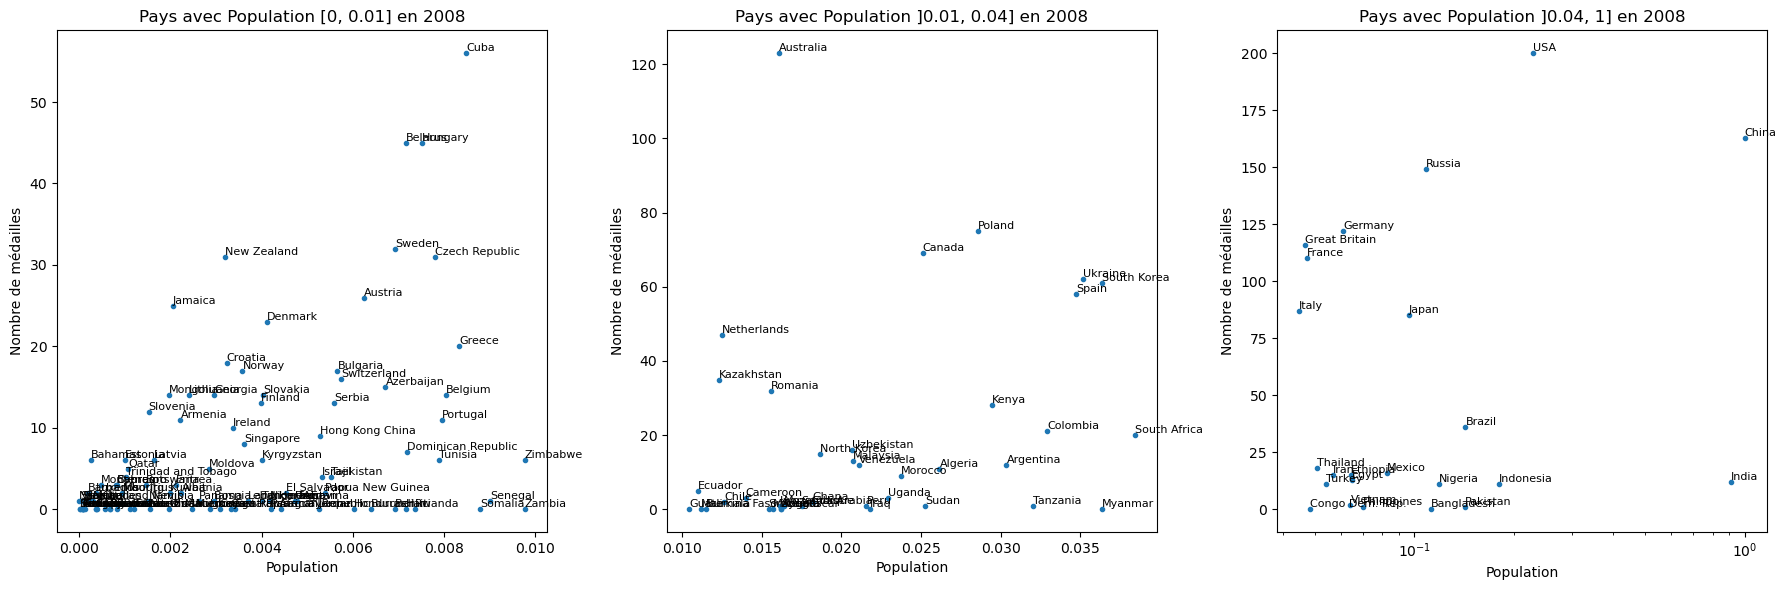

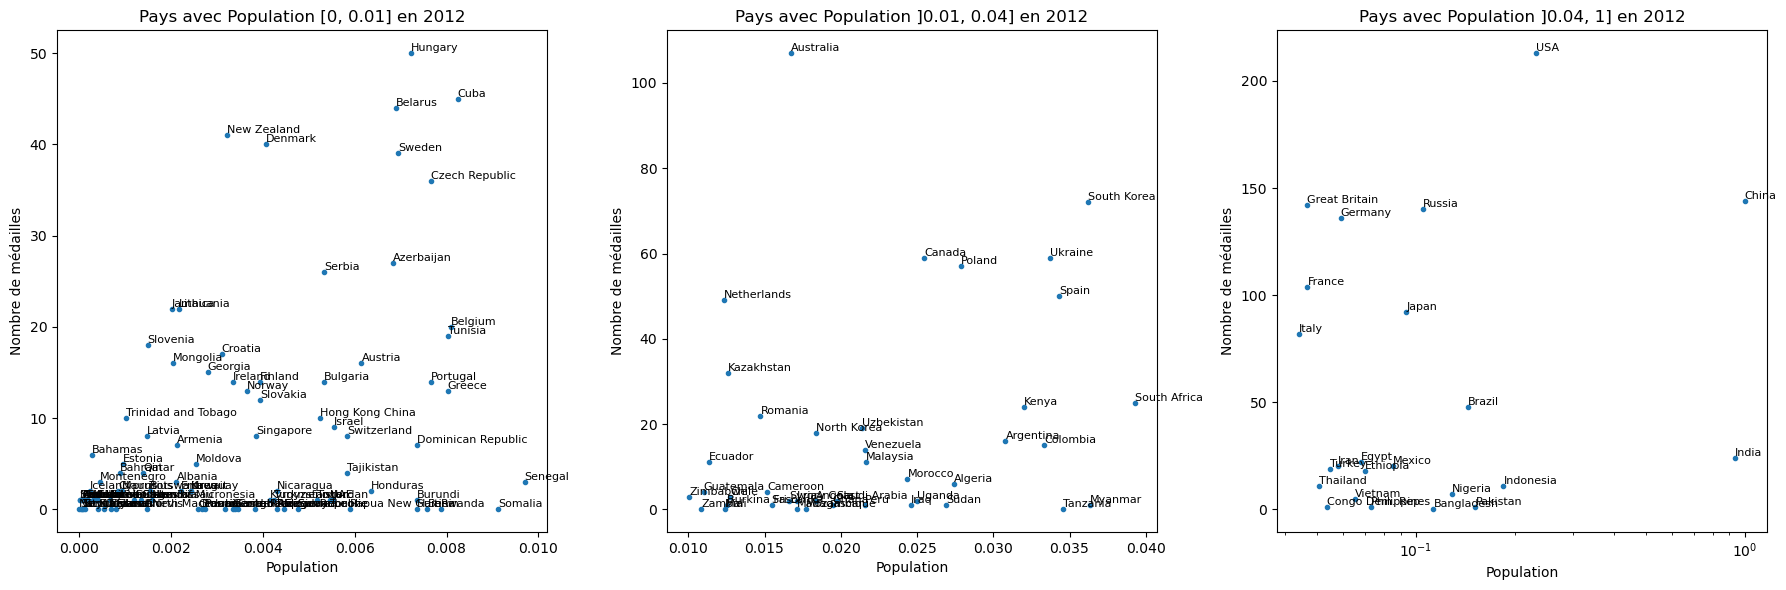

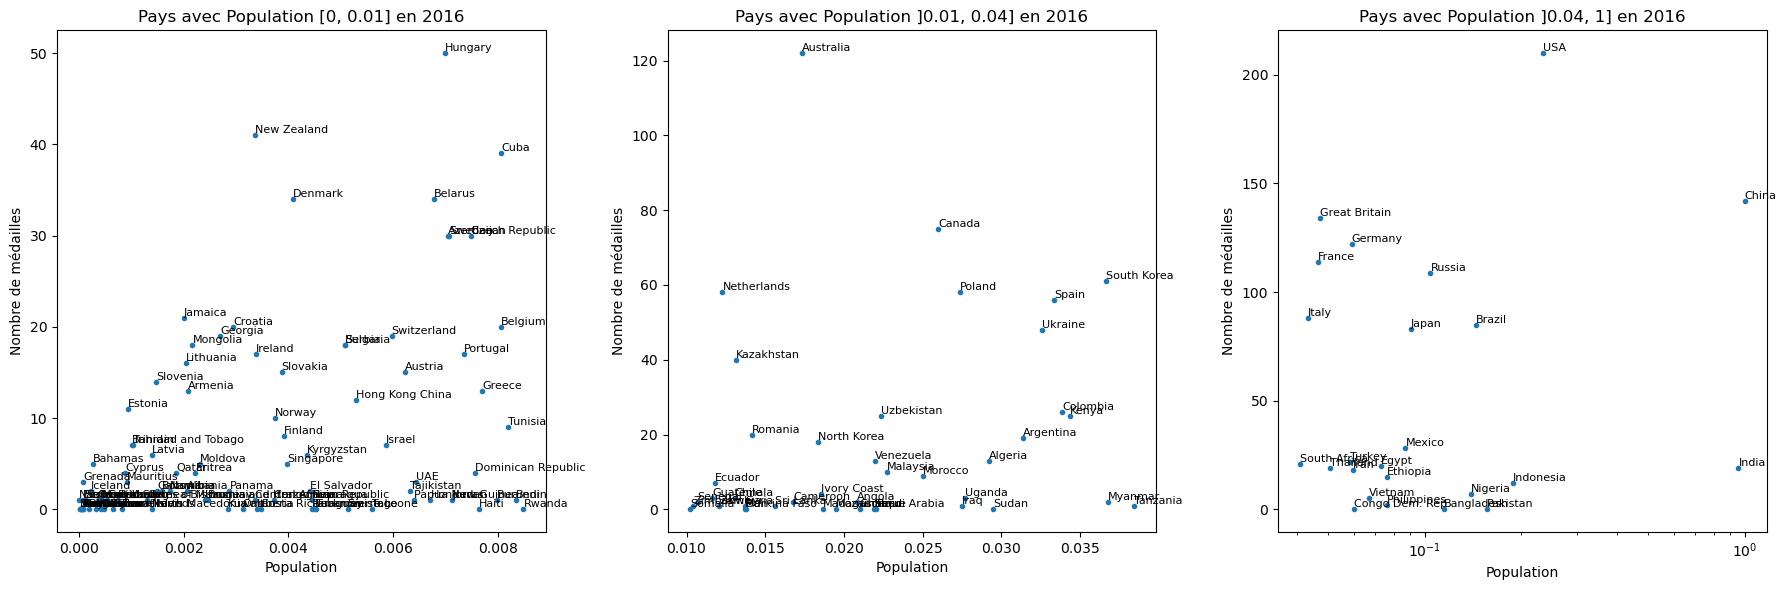

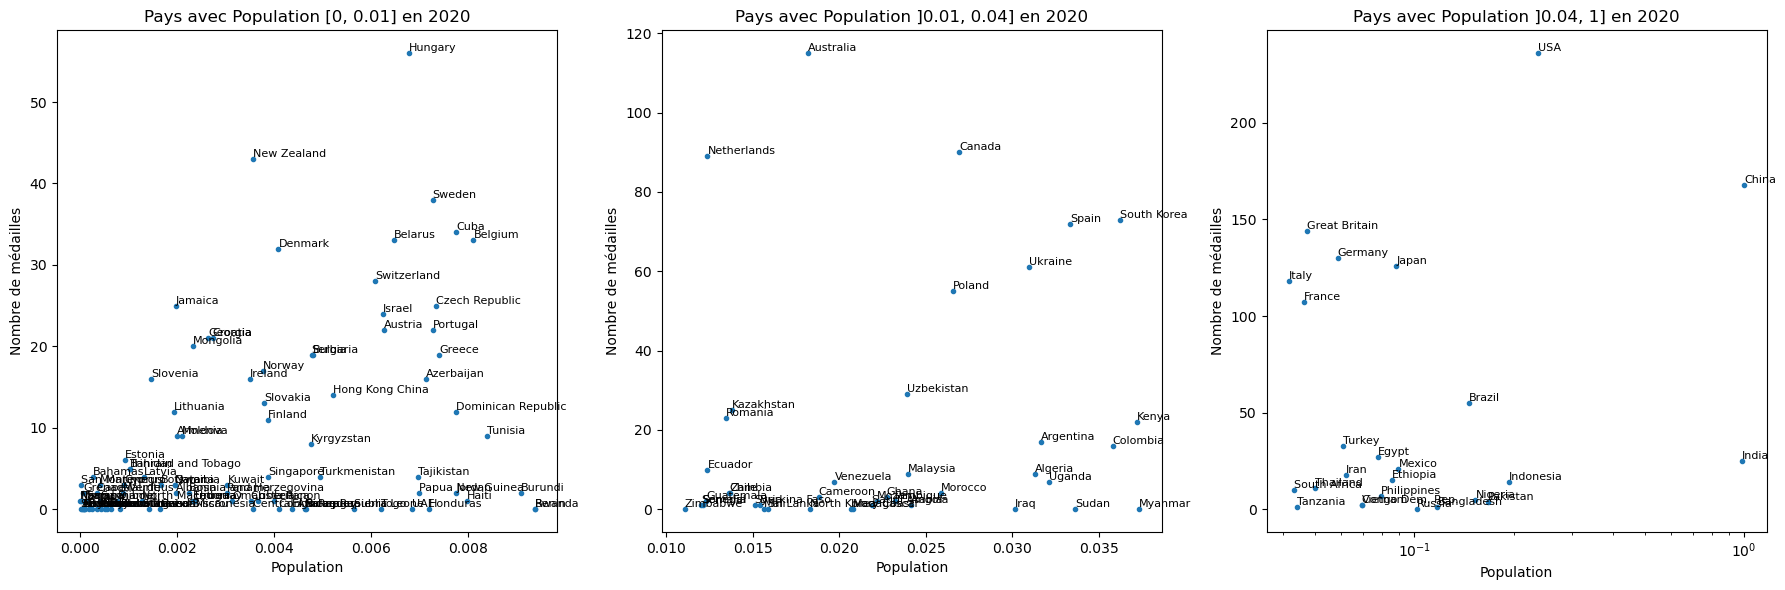

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'medals' et 'pop' sont les dictionnaires contenant les données
years = ['1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']

# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []
    
    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])
    
    # Créer un DataFrame fusionné
    merged = pd.DataFrame({'country': countries, 'population': populations, 'medals': medals_counts})
    
    # Créer une figure pour chaque année
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes
    
    # Filtrer les données pour la population comprise entre [0, threshold1] pour le premier graphique
    merged1 = merged[merged['population'] <= threshold1]
    
    # Tracer le premier graphique (population entre 0 et threshold1)
    axes[0].plot(merged1['population'], merged1['medals'], '.', label='Points')
    for i, country in enumerate(merged1['country']):
        axes[0].text(merged1['population'].iloc[i], merged1['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[0].set_xlabel("Population")
    axes[0].set_ylabel("Nombre de médailles")
    axes[0].set_title(f"Pays avec Population [0, {threshold1}] en {year}")
    
    # Filtrer les données pour la population comprise entre ]threshold1, threshold2] pour le second graphique
    merged2 = merged[(merged['population'] > threshold1) & (merged['population'] <= threshold2)]
    
    # Tracer le deuxième graphique (population entre threshold1 et threshold2)
    axes[1].plot(merged2['population'], merged2['medals'], '.', label='Points')
    for i, country in enumerate(merged2['country']):
        axes[1].text(merged2['population'].iloc[i], merged2['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[1].set_xlabel("Population")
    axes[1].set_ylabel("Nombre de médailles")
    axes[1].set_title(f"Pays avec Population ]{threshold1}, {threshold2}] en {year}")
    
    # Filtrer les données pour la population comprise entre ]threshold2, 1] pour le troisième graphique
    merged3 = merged[merged['population'] > threshold2]
    
    # Tracer le troisième graphique (population entre threshold2 et 1)
    axes[2].plot(merged3['population'], merged3['medals'], '.', label='Points')
    for i, country in enumerate(merged3['country']):
        axes[2].text(merged3['population'].iloc[i], merged3['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[2].set_xscale('log')
    axes[2].set_xlabel("Population")
    axes[2].set_ylabel("Nombre de médailles")
    axes[2].set_title(f"Pays avec Population ]{threshold2}, 1] en {year}")
    
    # Ajuster l'espace entre les graphiques
    plt.tight_layout()
    
    # Afficher les graphiques
    plt.show()



Le film a été créé avec succès et sauvegardé sous le nom 'output.mp4'.


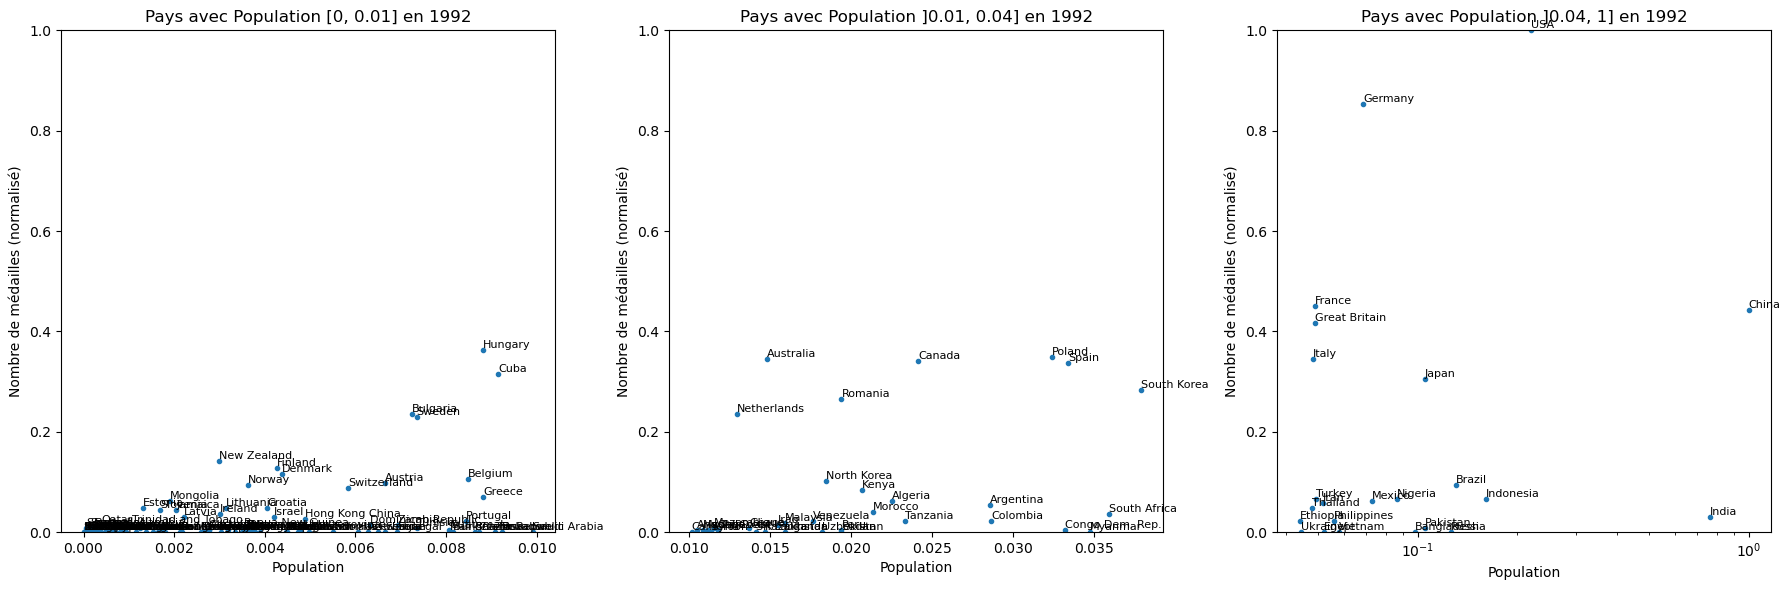

In [ ]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Nom du film
filename = 'output'

# Créer une figure pour l'animation
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

def update(year):
    # Effacer les axes pour chaque nouvelle année
    for ax in axes:
        ax.clear()
    
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []
    
    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])
    
    # Créer un DataFrame fusionné
    merged = pd.DataFrame({'country': countries, 'population': populations, 'medals': medals_counts})
    
    # Normaliser les médailles entre 0 et 1 pour chaque sous-graphe
    merged['medals_normalized'] = merged['medals'] / merged['medals'].max()
    
    # Filtrer les données pour la population comprise entre [0, threshold1] pour le premier graphique
    merged1 = merged[merged['population'] <= threshold1]
    
    # Tracer le premier graphique (population entre 0 et threshold1)
    axes[0].plot(merged1['population'], merged1['medals_normalized'], '.', label='Points')
    for i, country in enumerate(merged1['country']):
        axes[0].text(merged1['population'].iloc[i], merged1['medals_normalized'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[0].set_xlabel("Population")
    axes[0].set_ylabel("Nombre de médailles (normalisé)")
    axes[0].set_title(f"Pays avec Population [0, {threshold1}] en {year}")
    axes[0].set_ylim(0, 1)
    
    # Filtrer les données pour la population comprise entre ]threshold1, threshold2] pour le second graphique
    merged2 = merged[(merged['population'] > threshold1) & (merged['population'] <= threshold2)]
    
    # Tracer le deuxième graphique (population entre threshold1 et threshold2)
    axes[1].plot(merged2['population'], merged2['medals_normalized'], '.', label='Points')
    for i, country in enumerate(merged2['country']):
        axes[1].text(merged2['population'].iloc[i], merged2['medals_normalized'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[1].set_xlabel("Population")
    axes[1].set_ylabel("Nombre de médailles (normalisé)")
    axes[1].set_title(f"Pays avec Population ]{threshold1}, {threshold2}] en {year}")
    axes[1].set_ylim(0, 1)
    
    # Filtrer les données pour la population comprise entre ]threshold2, 1] pour le troisième graphique
    merged3 = merged[merged['population'] > threshold2]
    
    # Tracer le troisième graphique (population entre threshold2 et 1)
    axes[2].plot(merged3['population'], merged3['medals_normalized'], '.', label='Points')
    for i, country in enumerate(merged3['country']):
        axes[2].text(merged3['population'].iloc[i], merged3['medals_normalized'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[2].set_xscale('log')
    axes[2].set_xlabel("Population")
    axes[2].set_ylabel("Nombre de médailles (normalisé)")
    axes[2].set_title(f"Pays avec Population ]{threshold2}, 1] en {year}")
    axes[2].set_ylim(0, 1)
    
    # Ajuster l'espace entre les graphiques
    plt.tight_layout()

# Créer l'animation
ani = animation.FuncAnimation(fig, update, frames=years, repeat=False)

# Sauvegarder l'animation en tant que fichier mp4
ani.save('output.mp4', writer='ffmpeg', fps=1)  # Chaque frame dure 1 seconde (fps=1)
#ani.save(f'{filename}.mp4', writer='ffmpeg', fps=0.1)  # Chaque frame dure 10 secondes (fps=0.1)

print("Le film a été créé avec succès et sauvegardé sous le nom 'output.mp4'.")


Le film a été créé avec succès et sauvegardé sous le nom 'output.mp4'.


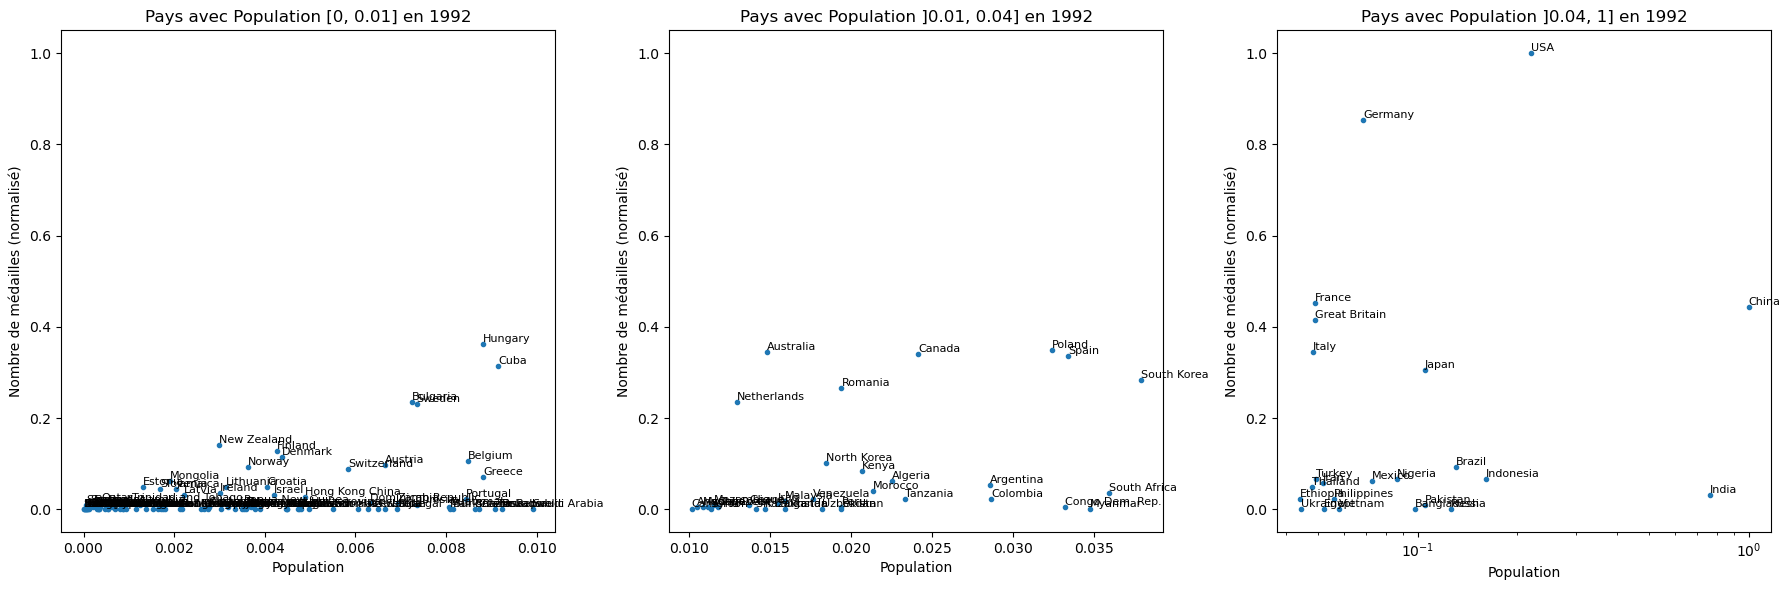

In [ ]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Nom du film
filename = 'output'

# Créer une figure pour l'animation
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

def update(year):
    # Effacer les axes pour chaque nouvelle année
    for ax in axes:
        ax.clear()
    
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []
    
    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])
    
    # Créer un DataFrame fusionné
    merged = pd.DataFrame({'country': countries, 'population': populations, 'medals': medals_counts})
    
    # Normaliser les médailles entre 0 et 1 pour chaque sous-graphe
    merged['medals_normalized'] = merged['medals'] / merged['medals'].max()
    
    # Filtrer les données pour la population comprise entre [0, threshold1] pour le premier graphique
    merged1 = merged[merged['population'] <= threshold1]
    
    # Tracer le premier graphique (population entre 0 et threshold1)
    axes[0].plot(merged1['population'], merged1['medals_normalized'], '.', label='Points')
    for i, country in enumerate(merged1['country']):
        axes[0].text(merged1['population'].iloc[i], merged1['medals_normalized'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[0].set_xlabel("Population")
    axes[0].set_ylabel("Nombre de médailles (normalisé)")
    axes[0].set_title(f"Pays avec Population [0, {threshold1}] en {year}")
    axes[0].set_ylim(-0.05, 1.05)  # Ajouter une marge en bas et en haut
    
    # Filtrer les données pour la population comprise entre ]threshold1, threshold2] pour le second graphique
    merged2 = merged[(merged['population'] > threshold1) & (merged['population'] <= threshold2)]
    
    # Tracer le deuxième graphique (population entre threshold1 et threshold2)
    axes[1].plot(merged2['population'], merged2['medals_normalized'], '.', label='Points')
    for i, country in enumerate(merged2['country']):
        axes[1].text(merged2['population'].iloc[i], merged2['medals_normalized'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[1].set_xlabel("Population")
    axes[1].set_ylabel("Nombre de médailles (normalisé)")
    axes[1].set_title(f"Pays avec Population ]{threshold1}, {threshold2}] en {year}")
    axes[1].set_ylim(-0.05, 1.05)  # Ajouter une marge en bas et en haut
    
    # Filtrer les données pour la population comprise entre ]threshold2, 1] pour le troisième graphique
    merged3 = merged[merged['population'] > threshold2]
    
    # Tracer le troisième graphique (population entre threshold2 et 1)
    axes[2].plot(merged3['population'], merged3['medals_normalized'], '.', label='Points')
    for i, country in enumerate(merged3['country']):
        axes[2].text(merged3['population'].iloc[i], merged3['medals_normalized'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[2].set_xscale('log')
    axes[2].set_xlabel("Population")
    axes[2].set_ylabel("Nombre de médailles (normalisé)")
    axes[2].set_title(f"Pays avec Population ]{threshold2}, 1] en {year}")
    axes[2].set_ylim(-0.05, 1.05)  # Ajouter une marge en bas et en haut
    
    # Ajuster l'espace entre les graphiques
    plt.tight_layout()

# Créer l'animation
ani = animation.FuncAnimation(fig, update, frames=years, repeat=False)

# Sauvegarder l'animation en tant que fichier mp4
ani.save(f'{filename}.mp4', writer='ffmpeg', fps=10)  # Chaque frame dure 1/x seconde

print(f"Le film a été créé avec succès et sauvegardé sous le nom '{filename}.mp4'.")


In [ ]:
# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Créer une visualisation interactive avec Plotly
fig = px.scatter(df, x='population', y='medals', animation_frame='year', animation_group='country',
                 size='medals', color='country', hover_name='country',
                 log_x=True, size_max=60, range_x=[0.00001, 1], range_y=[0, df['medals'].max()])

fig.update_layout(title='Nombre de médailles par population au fil des années',
                  xaxis_title='Population (log scale)',
                  yaxis_title='Nombre de médailles')

fig.show()


In [62]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Normaliser les médailles entre 0 et 1
df['medals_normalized'] = df['medals'] / df['medals'].max()

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1]
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)]
df3 = df[df['population'] > threshold2]

# Définir une fonction pour colorer les pays en gris s'ils ont 0 médailles
def color_medals(row, threshold=0):
    return 'gray' if row['medals'] <= threshold else row['medals']

# Appliquer la fonction de coloration
df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[0.00001, 1], range_y=[-0.05, 1.05],
                  color_continuous_scale=px.colors.sequential.Viridis)

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[0.00001, 1], range_y=[-0.05, 1.05],
                  color_continuous_scale=px.colors.sequential.Viridis)

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[0.00001, 1], range_y=[-0.05, 1.05],
                  color_continuous_scale=px.colors.sequential.Viridis)

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\1650098801.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\1650098801.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\1650098801.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [63]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Normaliser les médailles entre 0 et 1
df['medals_normalized'] = df['medals'] / df['medals'].max()

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1]
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)]
df3 = df[df['population'] > threshold2]

# Définir une fonction pour colorer les pays en gris s'ils ont 0 médailles
def color_medals(row, threshold=0):
    return 'gray' if row['medals'] <= threshold else row['country']

# Appliquer la fonction de coloration
df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[0.00001, threshold1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray': 'gray'})

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[threshold1+0.00001, threshold2], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray': 'gray'})

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[threshold2+0.00001, 1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray': 'gray'})

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3434987129.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3434987129.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3434987129.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [64]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Normaliser les médailles entre 0 et 1
df['medals_normalized'] = df['medals'] / df['medals'].max()

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1]
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)]
df3 = df[df['population'] > threshold2]

# Définir une fonction pour colorer les pays en gris s'ils ont moins ou égal à un seuil de médailles
def color_medals(row, threshold=1):
    return row['country'] if row['medals'] > threshold else "gray"

# Appliquer la fonction de coloration
df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size_max=20, color='color', hover_name='country',
                  log_x=True, range_x=[1e-5, threshold1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population [0, {threshold1}]")

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size_max=20, color='color', hover_name='country',
                  log_x=True, range_x=[threshold1+1e-5, threshold2], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold1}, {threshold2}]")

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size_max=20, color='color', hover_name='country',
                  log_x=True, range_x=[threshold2+1e-5, 1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold2}, 1]")

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3369748054.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3369748054.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3369748054.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [65]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1]
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)]
df3 = df[df['population'] > threshold2]

# Normaliser les médailles entre 0 et 1 pour chaque sous-graphique
df1['medals_normalized'] = df1['medals'] / df1['medals'].max()
df2['medals_normalized'] = df2['medals'] / df2['medals'].max()
df3['medals_normalized'] = df3['medals'] / df3['medals'].max()

# Définir une fonction pour colorer les pays en gris s'ils ont moins ou égal à un seuil de médailles
def color_medals(row, threshold=1):
    return row['country'] if row['medals'] > threshold else "gray"

# Appliquer la fonction de coloration
df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size_max=60, color='color', hover_name='country',
                  log_x=True, range_x=[1e-5, threshold1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population [0, {threshold1}]")

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size_max=60, color='color', hover_name='country',
                  log_x=True, range_x=[threshold1+1e-5, threshold2], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold1}, {threshold2}]")

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size_max=60, color='color', hover_name='country',
                  log_x=True, range_x=[threshold2+1e-5, 1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold2}, 1]")

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\2166385352.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\2166385352.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\2166385352.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [66]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1]
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)]
df3 = df[df['population'] > threshold2]

# Normaliser les médailles entre 0 et 1 pour chaque sous-graphique
df1['medals_normalized'] = df1['medals'] / df1['medals'].max()
df2['medals_normalized'] = df2['medals'] / df2['medals'].max()
df3['medals_normalized'] = df3['medals'] / df3['medals'].max()

# Définir une fonction pour colorer les pays en gris s'ils ont moins ou égal à un seuil de médailles
def color_medals(row, threshold=1):
    return row['country'] if row['medals'] > threshold else "gray"

# Appliquer la fonction de coloration
df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df1), color='color', hover_name='country',
                  log_x=True, range_x=[1e-5, threshold1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population [0, {threshold1}]")

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df2), color='color', hover_name='country',
                  log_x=True, range_x=[threshold1+1e-5, threshold2], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold1}, {threshold2}]")

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df3), color='color', hover_name='country',
                  log_x=True, range_x=[threshold2+1e-5, 1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold2}, 1]")

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3233366988.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3233366988.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3233366988.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [84]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1]
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)]
df3 = df[df['population'] > threshold2]

# Normaliser les médailles entre 0 et 1 pour chaque sous-graphique
df1['medals_normalized'] = df1['medals'] / df1['medals'].max()
df2['medals_normalized'] = df2['medals'] / df2['medals'].max()
df3['medals_normalized'] = df3['medals'] / df3['medals'].max()

# Définir une fonction pour colorer les pays en gris s'ils ont moins ou égal à un seuil de médailles
def color_medals(row, threshold=1):
    return row['country'] if row['medals'] > threshold else "gray"

# Appliquer la fonction de coloration
df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df1), color='color', hover_name='country',
                  log_x=True, range_x=[1e-5 * 0.9, threshold1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population [0, {threshold1}]")
fig1.update_layout(xaxis_title="Population (normalisée)", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df2), color='color', hover_name='country',
                  log_x=True, range_x=[threshold1 * 0.9, threshold2 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold1}, {threshold2}]")
fig2.update_layout(xaxis_title="Population (normalisée)", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df3), color='color', hover_name='country',
                  log_x=True, range_x=[threshold2 * 0.9, 1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays avec Population ]{threshold2}, 1]")
fig3.update_layout(xaxis_title="log{Population (normalisée)}", yaxis_title="Résultats (normalisés)")

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3181871097.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3181871097.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3181871097.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [88]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1].copy()
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)].copy()
df3 = df[df['population'] > threshold2].copy()

# Normaliser les médailles entre 0 et 1 pour chaque sous-graphique
df1.loc[:, 'medals_normalized'] = df1['medals'] / df1['medals'].max()
df2.loc[:, 'medals_normalized'] = df2['medals'] / df2['medals'].max()
df3.loc[:, 'medals_normalized'] = df3['medals'] / df3['medals'].max()

# Définir une fonction pour colorer les pays en gris s'ils ont moins ou égal à un seuil de médailles
def color_medals(row, threshold=1):
    return row['country'] if row['medals'] > threshold else "gray"

# Appliquer la fonction de coloration
df1.loc[:, 'color'] = df1.apply(color_medals, axis=1)
df2.loc[:, 'color'] = df2.apply(color_medals, axis=1)
df3.loc[:, 'color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df1), color='color', hover_name='country',
                  log_x=True, range_x=[1e-5 * 0.9, threshold1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Petits pays")
fig1.update_layout(xaxis_title="log{Population (normalisée)}", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df2), color='color', hover_name='country',
                  log_x=True, range_x=[threshold1 * 0.9, threshold2 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays de taille moyenne")
fig2.update_layout(xaxis_title="log{Population (normalisée)}", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df3), color='color', hover_name='country',
                  log_x=True, range_x=[threshold2 * 0.9, 1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Grands pays")
fig3.update_layout(xaxis_title="log{Population (normalisée)}", yaxis_title="Résultats (normalisés)")

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


In [ ]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1].copy()
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)].copy()
df3 = df[df['population'] > threshold2].copy()

# Normaliser les médailles entre 0 et 1 pour chaque sous-graphique
df1.loc[:, 'medals_normalized'] = df1['medals'] / df1['medals'].max()
df2.loc[:, 'medals_normalized'] = df2['medals'] / df2['medals'].max()
df3.loc[:, 'medals_normalized'] = df3['medals'] / df3['medals'].max()

# Définir une fonction pour colorer les pays en gris s'ils ont moins ou égal à un seuil de médailles
def color_medals(row, threshold=1):
    return row['country'] if row['medals'] > threshold else "gray"

# Appliquer la fonction de coloration
df1.loc[:, 'color'] = df1.apply(color_medals, axis=1)
df2.loc[:, 'color'] = df2.apply(color_medals, axis=1)
df3.loc[:, 'color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df1), color='color', hover_name='country',
                  log_x=True, range_x=[1e-5 * 0.9, threshold1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Petits pays")
fig1.update_layout(xaxis_title="Population (normalisée)", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df2), color='color', hover_name='country',
                  log_x=True, range_x=[threshold1 * 0.9, threshold2 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Pays de taille moyenne")
fig2.update_layout(xaxis_title="Population (normalisée)", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df3), color='color', hover_name='country',
                  log_x=True, range_x=[threshold2 * 0.9, 1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray':'gray'}, title=f"Grands pays")
fig3.update_layout(xaxis_title="log{Population (normalisée)}", yaxis_title="Résultats (normalisés)")

# Exporter les graphiques interactifs en fichiers HTML
fig1.write_html("petits_pays_population.html")
fig2.write_html("pays_moyens_population.html")
fig3.write_html("grands_pays_population.html")

print("Les graphiques interactifs ont été exportés en fichiers HTML.")


Les graphiques interactifs ont été exportés en fichiers HTML.
